In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

## Data -1

In [2]:
car1 = pd.read_csv('Part1 - Car name.csv')
car1.sample(5)

,car_name
376,mazda glc custom l
15,plymouth duster
120,volvo 144ea
55,volkswagen model 111
84,toyota corolla 1600 (sw)


In [3]:
car1.shape

(398, 1)

## Data-2

In [4]:
car2 = pd.read_json('Part1 - Car-Attributes.json')
car2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
car2.shape

(398, 8)

## Joining Both Dataset & Data Cleaning

In [6]:
df=pd.concat([car1,car2],axis=1)
df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
df=df.drop('car_name', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [9]:
df.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [10]:
df = df[df.hp != '?']

In [11]:
df.hp = df.hp.astype('float')
df.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

In [12]:
df.isna().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [13]:
df.duplicated().any()

False

In [14]:
df.shape

(392, 8)

In [15]:
df['Country'] = df.origin.replace([1,2,3],['america','Europe','australia'])
df.sample(6)

,mpg,cyl,disp,hp,wt,acc,yr,origin,Country
312,37.2,4,86.0,65.0,2019,16.4,80,3,australia
24,21.0,6,199.0,90.0,2648,15.0,70,1,america
61,21.0,4,122.0,86.0,2226,16.5,72,1,america
300,23.9,8,260.0,90.0,3420,22.2,79,1,america
265,17.5,8,318.0,140.0,4080,13.7,78,1,america
229,16.0,8,400.0,180.0,4220,11.1,77,1,america


In [16]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [18]:
df.mpg.describe().T

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [19]:
df.median()

mpg         22.75
cyl          4.00
disp       151.00
hp          93.50
wt        2803.50
acc         15.50
yr          76.00
origin       1.00
dtype: float64

In [20]:
df.groupby("origin").mean()

,mpg,cyl,disp,hp,wt,acc,yr
origin,,,,,,,
1,20.033469,6.277551,247.512245,119.048980,3372.489796,14.990204,75.591837
2,27.602941,4.161765,109.632353,80.558824,2433.470588,16.794118,75.676471
3,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038


# Data Visualisation
## Univariate Analysis
### Visualization of Continious Variable 

In [21]:
import matplotlib.pyplot as plt
import seaborn  as  sns 
sns.set(color_codes=True)
%matplotlib inline 

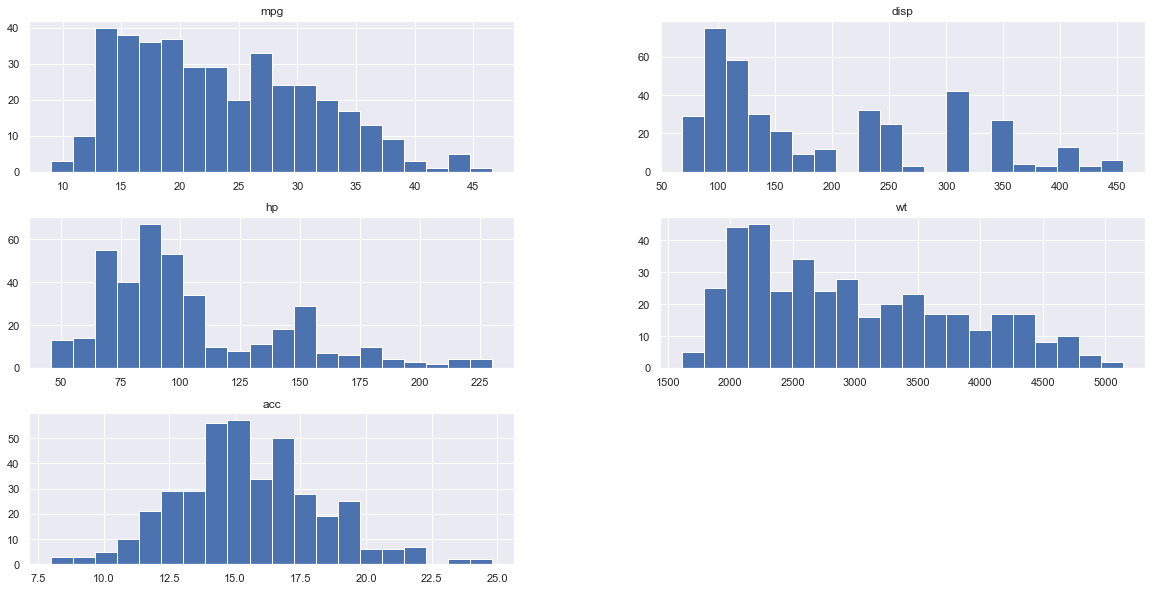

In [22]:
cars=df.drop(['cyl','yr','origin'], axis=1)
cars.hist(bins=20,figsize=(20,10));

## Visualization of Discrete Variable 

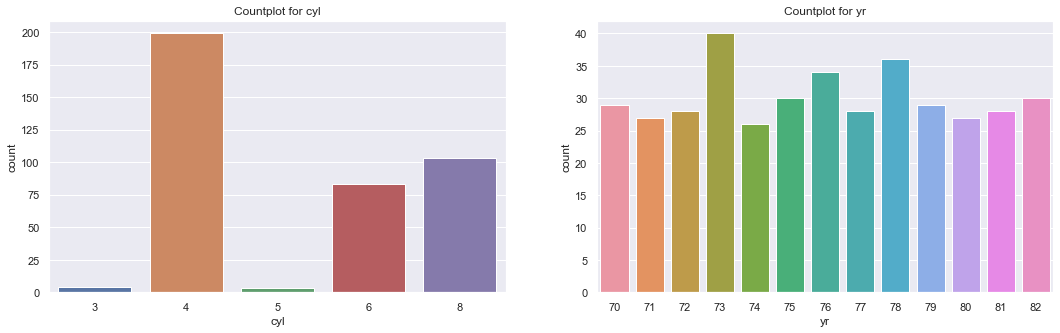

In [23]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title('Countplot for cyl')
sns.countplot(df['cyl']);
plt.subplot(1,2,2)
plt.title('Countplot for yr')
sns.countplot(df['yr']);
plt.show()

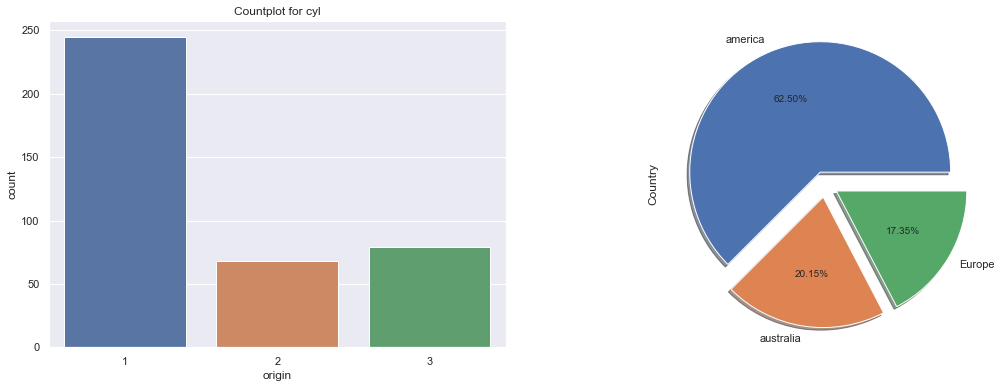

In [24]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Countplot for cyl')
sns.countplot(df['origin']);
plt.subplot(1,2,2)
df['Country'].value_counts().plot.pie(shadow=True , autopct='%1.2f%%', explode=(0.1,0.1,0.1))
plt.show()

## Bivariate Analysis  

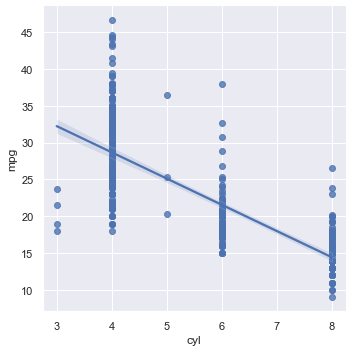

In [25]:
sns.lmplot(x='cyl',y='mpg', data=df );

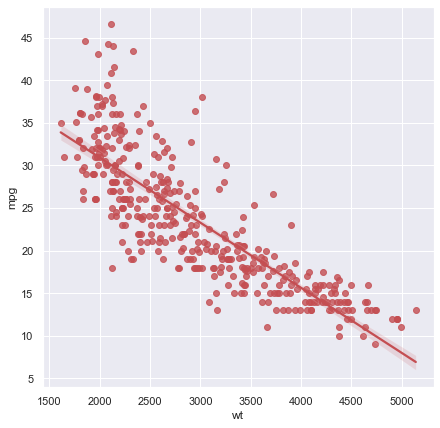

In [26]:
plt.figure(figsize=(7,7))
sns.regplot(x='wt',y='mpg', data=df , color='r');

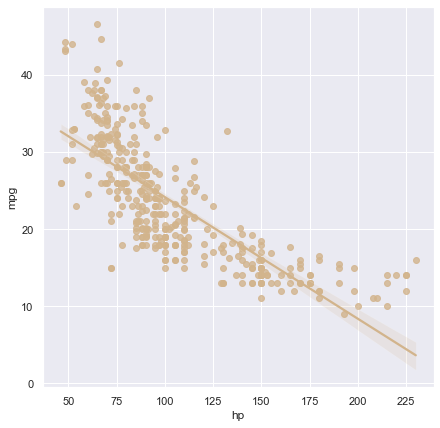

In [27]:
plt.figure(figsize=(7,7))
sns.regplot(x='hp',y='mpg', data=df, color='Tan' );

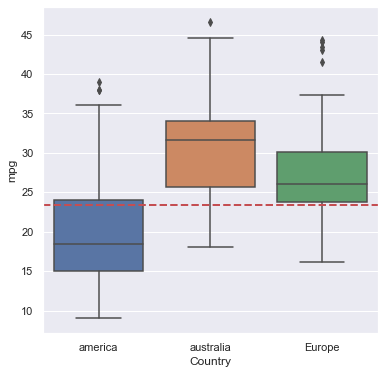

In [28]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Country', y='mpg' , data=df )
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

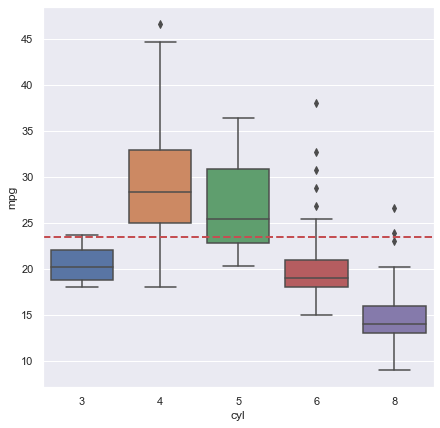

In [29]:
plt.figure(figsize=(7,7))
sns.boxplot(x='cyl', y='mpg' , data=df )
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

##  Multivariate Analysis

<Figure size 576x576 with 0 Axes>

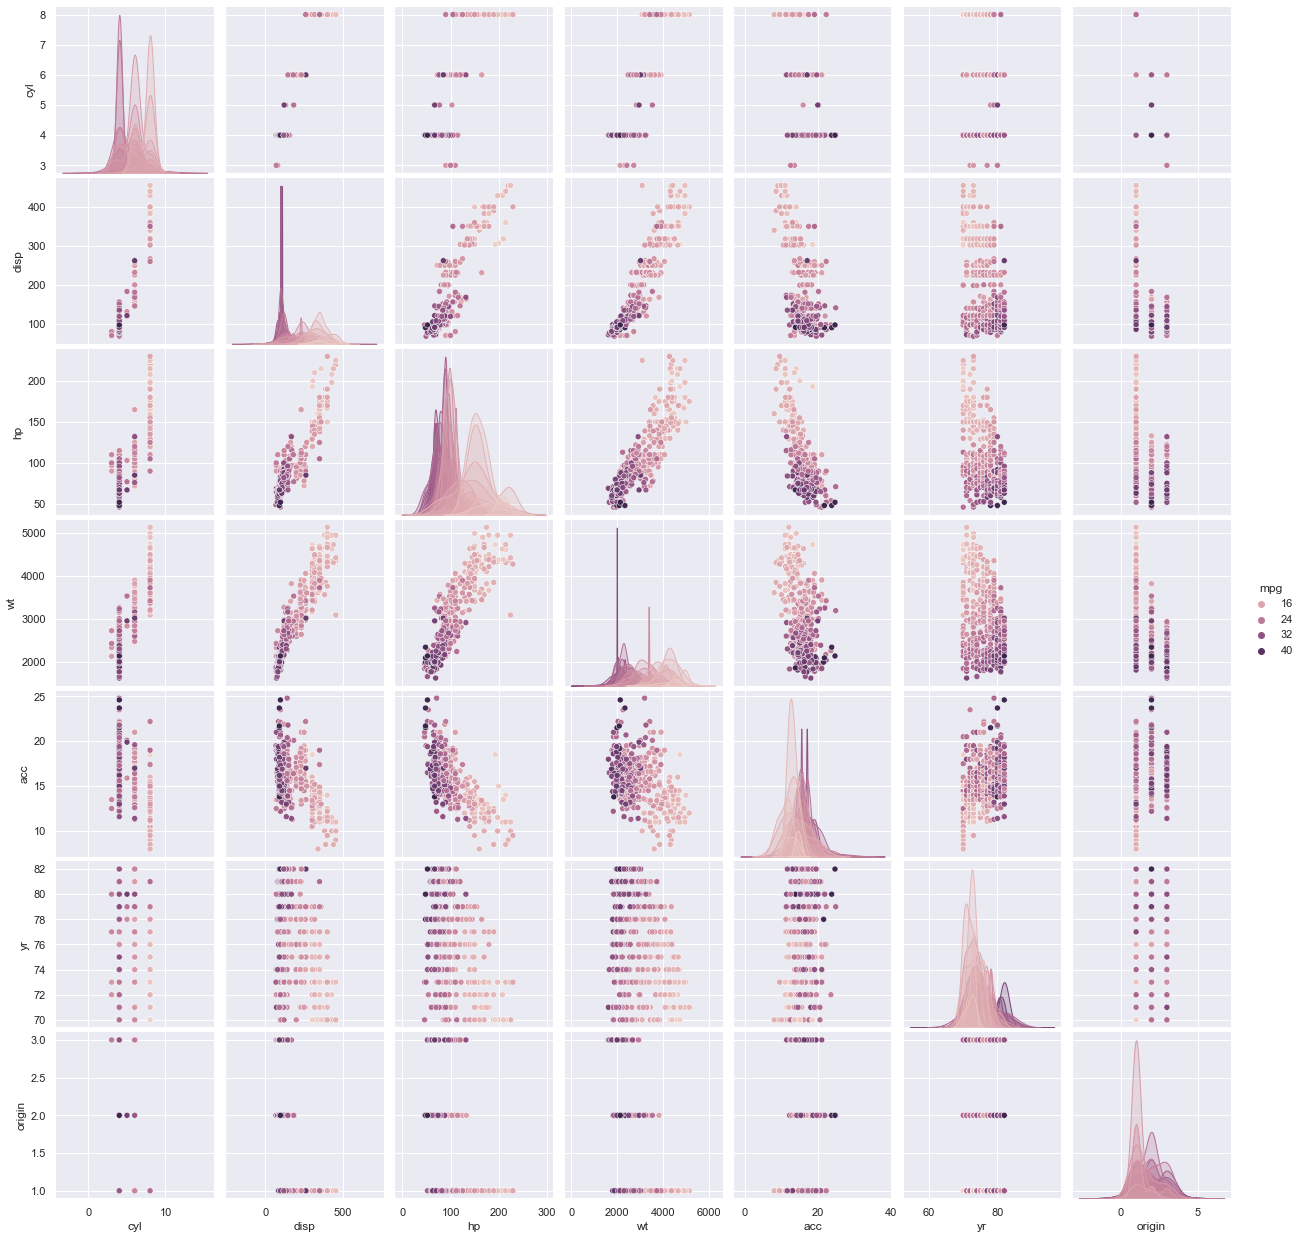

In [30]:
plt.figure(figsize=(8,8))
sns.pairplot(df, hue = 'mpg')

<Figure size 576x576 with 0 Axes>

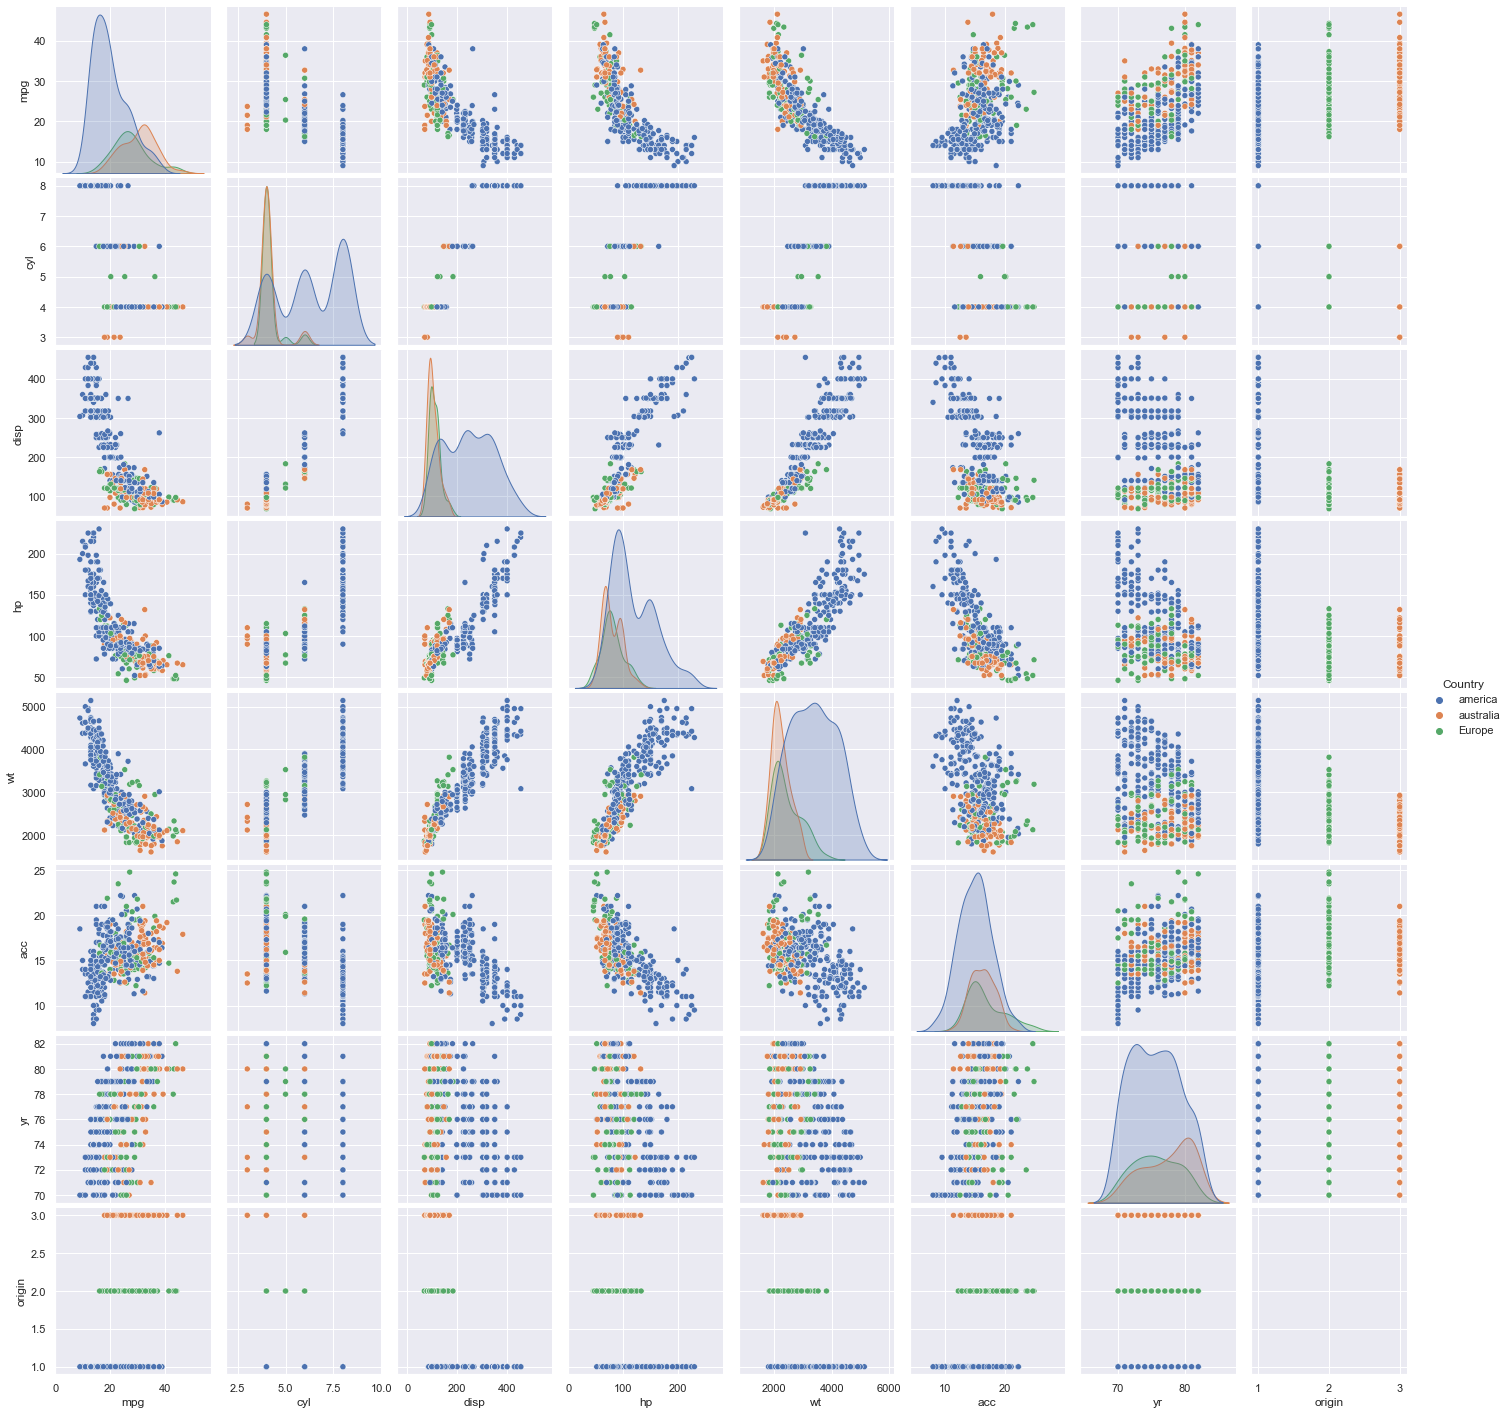

In [31]:
plt.figure(figsize=(8,8))
sns.pairplot(df, hue='Country')

<AxesSubplot:>

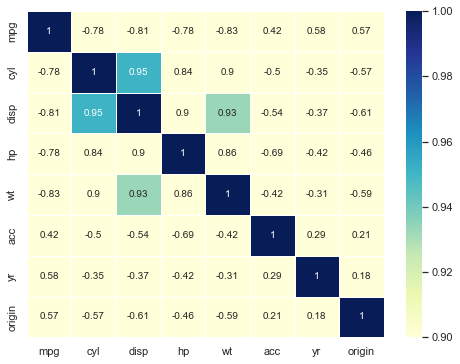

In [32]:
plt.figure(figsize=(8,6))
corr=df.corr()
sns.heatmap(corr,annot=True,vmin=0.9,linewidths=.5, cbar=True, cmap="YlGnBu")

<Figure size 576x432 with 0 Axes>

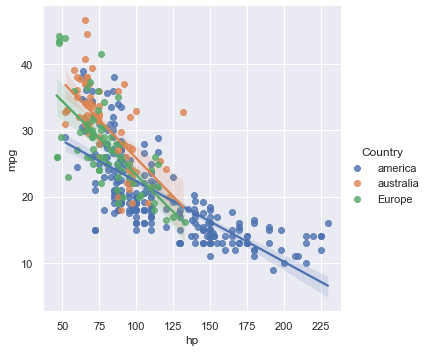

In [33]:
plt.figure(figsize=(8,6))
sns.lmplot(x='hp',y='mpg',data=df,hue='Country');

<Figure size 576x432 with 0 Axes>

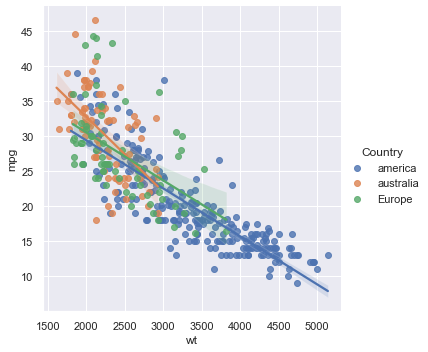

In [34]:
plt.figure(figsize=(8,6))
sns.lmplot(x='wt',y='mpg',data=df,hue='Country');

## Data Pre-Processing

In [35]:
col=['mpg','wt','cyl','disp','hp','acc','origin','yr']
for x in col:
    q25,q75=np.percentile(df[x],25),np.percentile(df[x],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[x for x in df[x] if x < lower or x > upper]
    print('{} Total Number of outliers in {} : {}'.format('\033[1m',x,len(Outliers)))
    print('\n')

 Total Number of outliers in mpg : 0


 Total Number of outliers in wt : 0


 Total Number of outliers in cyl : 0


 Total Number of outliers in disp : 0


 Total Number of outliers in hp : 10


 Total Number of outliers in acc : 11


 Total Number of outliers in origin : 0


 Total Number of outliers in yr : 0




##  Scaling of Data

In [36]:
df['Country'] = df.origin.replace([1,2,3],['america','Europe','australia'])
df=df.drop(['Country','origin'] , axis=1)

In [37]:
from scipy import stats 
from scipy.stats import zscore
df1=df
df1=df1.drop(columns='mpg')
df1=df1.apply(zscore)

##  K- means Clustering 

In [38]:
from sklearn.cluster import KMeans

In [39]:
wss =[] 
for i in range(1,5):
    KM = KMeans(n_clusters=i)
    KM.fit(df1)
    wss.append(KM.inertia_)
wss

[2352.0000000000005, 1051.1361179339187, 793.7256177123365, 631.4112941569547]

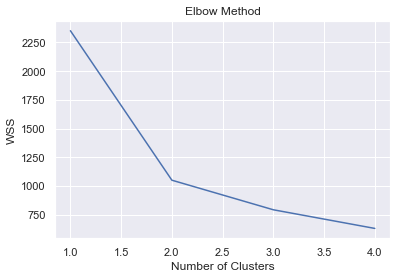

In [40]:
plt.plot(range(1,5), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [41]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=2)
k_means.fit(df1)
labels=k_means.labels_

In [42]:
k_means.inertia_

1051.1361179339187

In [43]:
kclus=df
kclus['clus_k']=labels
kclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,clus_k
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


In [44]:
kclus['clus_k'].value_counts().sort_index()

0    104
1    288
Name: clus_k, dtype: int64

In [45]:
avg=kclus.groupby(['clus_k']).mean()
avg['count']=kclus.clus_k.value_counts().sort_index()
avg

,mpg,cyl,disp,hp,wt,acc,yr,count
clus_k,,,,,,,,
0,14.932692,7.961538,343.894231,158.557692,4103.875000,12.875962,73.865385,104
1,26.520139,4.572917,140.432292,84.937500,2570.868056,16.503819,76.743056,288


## Heirarchical Clustering

In [46]:
from scipy import stats 
from scipy.stats import zscore

In [47]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
linkage_method=linkage(df1, metric='euclidean', method='complete')

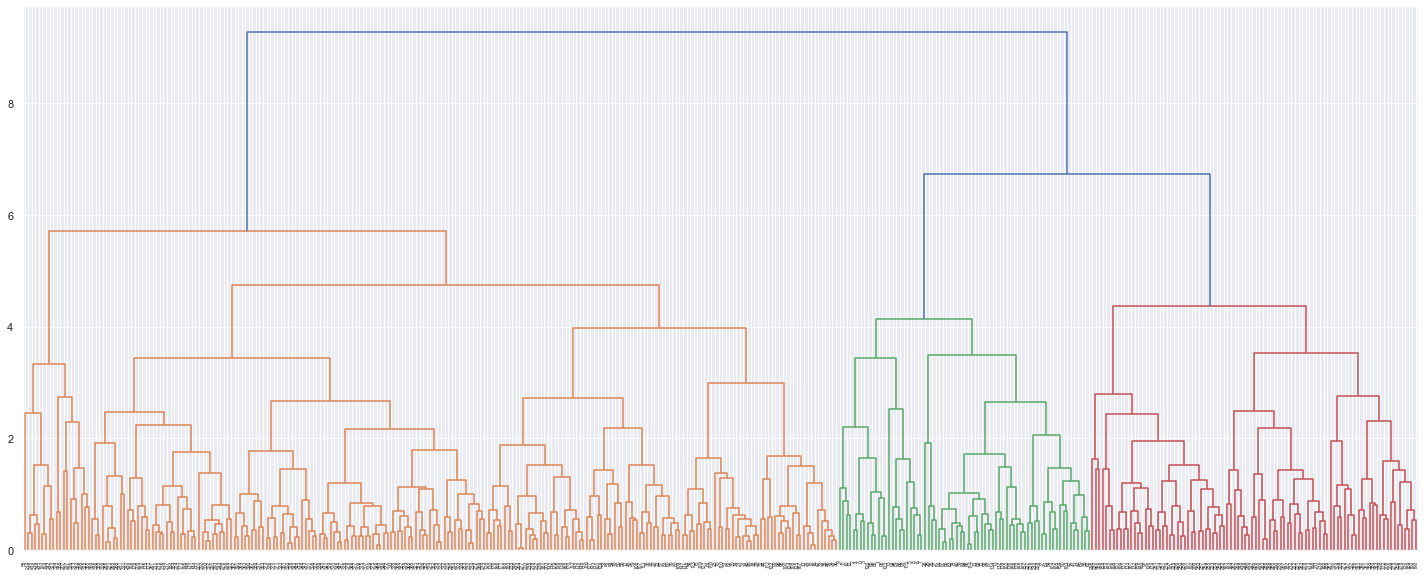

In [48]:
plt.figure(figsize=(25,10))
dendrogram(linkage_method)
plt.show()

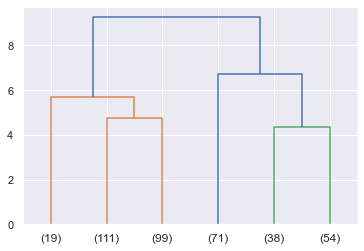

In [49]:
dendrogram(linkage_method,truncate_mode='lastp',p=6)
plt.show()

In [50]:
from scipy.cluster.hierarchy import fcluster
fcluster2=fcluster(linkage_method,2,criterion='maxclust')
fcluster2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,

In [51]:
hclus=df
hclus['clus_h']=fcluster2
hclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,clus_k,clus_h
0,18.0,8,307.0,130.0,3504,12.0,70,0,2
1,15.0,8,350.0,165.0,3693,11.5,70,0,2
2,18.0,8,318.0,150.0,3436,11.0,70,0,2
3,16.0,8,304.0,150.0,3433,12.0,70,0,2
4,17.0,8,302.0,140.0,3449,10.5,70,0,2


In [52]:
hclus['clus_h'].value_counts().sort_index()

1    229
2    163
Name: clus_h, dtype: int64

In [53]:
avg=kclus.groupby(['clus_h']).mean()
avg['count']=hclus.clus_h.value_counts().sort_index()
avg

,mpg,cyl,disp,hp,wt,acc,yr,clus_k,count
clus_h,,,,,,,,,
1,28.137555,4.196507,120.294760,80.646288,2384.165939,16.437991,76.554585,0.995633,229
2,16.854601,7.263804,298.539877,137.938650,3811.282209,14.281595,75.171779,0.368098,163


## Linear Regression method 

In [54]:
df2=df
df2=df2.apply(zscore)
df2=df2.drop(columns=['clus_k','clus_h'])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats

x=df2.drop(columns='mpg')
y=df2['mpg']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.3, random_state=15)

In [57]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_model_predict=regression_model.predict(X_train)

In [58]:
print('The intercept of model is {}'. format(regression_model.intercept_))

The intercept of model is 0.035000920314645634


In [59]:
print('Accuracy on Training data:',regression_model.score(X_train, y_train) )
print('Accuracy on Test data:',regression_model.score(X_test, y_test) )

Accuracy on Training data: 0.8436711799540008
Accuracy on Test data: 0.7839453320859262


## Compare of both Cluster

In [60]:
kclus['clus_k'].value_counts()

1    288
0    104
Name: clus_k, dtype: int64

In [61]:
hclus['clus_h'].value_counts()

1    229
2    163
Name: clus_h, dtype: int64

In [62]:
kclus.shape

(392, 9)

In [63]:
hclus.shape

(392, 9)

## Linear Regression method with K_cluster

In [64]:
kclus=kclus.drop(columns='clus_h')

In [65]:

kclus['clus_k']=kclus['clus_k'].astype('category')
kclus['clus_k']=kclus['clus_k'].rename({0:'low avg', 1:'high avg'})
kclus=pd.get_dummies(kclus,columns=['clus_k'])
kclus.head()

,mpg,cyl,disp,hp,wt,acc,yr,clus_k_0,clus_k_1
0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0


In [66]:
x=kclus.drop(columns='mpg')
y=kclus['mpg']

In [67]:
X_tr,X_te,y_tr,y_te=train_test_split(x,y,train_size=0.3, random_state=15)

In [68]:
regression_model = LinearRegression()
regression_model.fit(X_tr, y_tr)
regression_model_predict=regression_model.predict(X_te)

In [69]:
print('The intercept of model is {}'. format(regression_model.intercept_))

The intercept of model is 2.4450175149462936


In [70]:
print('Accuracy on Training data:',regression_model.score(X_tr, y_tr) )
print('Accuracy on Test data:',regression_model.score(X_te, y_te) )

Accuracy on Training data: 0.8583901718314932
Accuracy on Test data: 0.794110505363395


##  obseravation

  1.The accuracy of model by linerRegression is 78%
  
  2.By kNN the clus is divided into high and low mpg.
  
  3.Adding linear with KNN clustering increases our result 
  as the accuracy increased to 80% from 78%
  
  4.Since this is a dataset of used cars it doesn't give us how many previous owners has the cars seen which might be helful variable,the gender of the previous owners,. With the above mentioned features it may be possible to get a higher accuracy or explainability of the models and its variables.